In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import norm
import math
import pickle

In [3]:
dpp_node_result = np.loadtxt('./CIFAR_DPP_node_0.0_batch128_results.csv', delimiter=',')
print(dpp_node_result.shape)

dpp_node_mean = np.mean(dpp_node_result, axis = 1)
dpp_node_std = np.std(dpp_node_result, axis = 1)

print(dpp_node_mean.shape, dpp_node_std.shape)

(9, 10)
(9,) (9,)


In [5]:
dpp_edge_result = np.loadtxt('./CIFAR_DPP_edge_0.0_batch128_results.csv', delimiter=',')
print(dpp_edge_result.shape)

dpp_edge_mean = np.mean(dpp_edge_result, axis = 1)
dpp_edge_std = np.std(dpp_edge_result, axis = 1)

(9, 10)


Text(0.5, 1.0, 'CIFAR10 Test Accuracy')

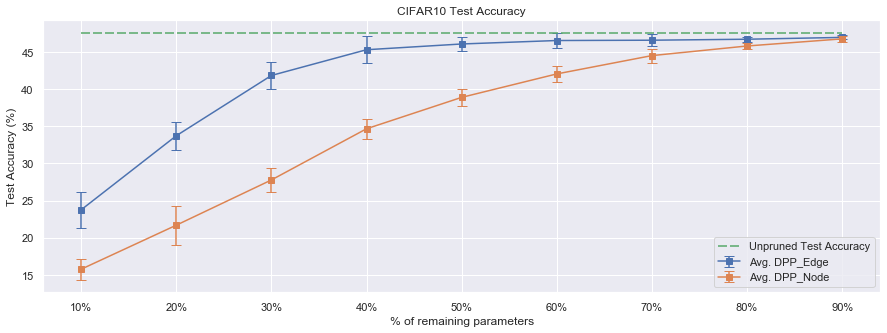

In [11]:
fig, axs = plt.subplots(1, 1, sharey = True, tight_layout = False, figsize=(15,5))

#     plt.xticks(rotation = 90)
#     axs.set_xticklabels(time_stamp)
# axs.set_xscale('log')

x = [str(i * 10) + '%' for i in range(1, 10)]
axs.errorbar(x, dpp_edge_mean, yerr = dpp_edge_std, marker = 's', capsize=5, label = 'Avg. DPP_Edge')
axs.errorbar(x, dpp_node_mean, yerr = dpp_node_std, marker = 's', capsize=5, label = 'Avg. DPP_Node')
axs.plot(x, [47.6 for i in x], dashes=[6, 2], label="Unpruned Test Accuracy")

axs.set_xlabel('% of remaining parameters')
axs.set_ylabel('Test Accuracy (%)')
axs.legend(loc = 'best')

title = 'CIFAR10 Test Accuracy'
axs.set_title(title)